# Lecture 2

(Summer 2022)

## Outline of topics for this segment:

1. The math package
2. The NumPy package
3. Plotting
4. Numpy arrays
5. Array indexing
6. SciPy and numerical linear algebra
7. Least squares


## Some useful background material:

The <a href="https://the-examples-book.com/book/introduction" target="_blank">Purdue Data Mine Examples Book</a> contains many useful chapters on data science. While they have not been directly designed for this class, they may be useful. You will not need to use scholar to perform the exercises of this class so don't worry about that part. Here is a direct link to the <a href="https://the-examples-book.com/book/python/introduction" target="_blank">Python chapter.</a>


## 1. The Math Package

Python provides many modules designed for specialized programming tasks. See: <a href="https://pypi.org" target="_blank">The Python Package Index</a>.

The math package contains trigonometric, exponential, logarithmic, hyperbolic, and special functions. It also contains a number of useful constants such as `pi` and `e`.

### Recall our homemade square root function ...

In [1]:
# A solution to the HW problem of the last class is the function ...
def Newtroot(z,epsilon):
    x = 1
    xp = (x + z/x)/2
    e = (xp - x)/x
    while (e > epsilon) or (-epsilon > e):
        x = xp
        xp = (x + z/x)/2
        e = (xp - x)/x
    return xp    

### The math package also has a square root function ...

In [2]:
# This command fetches the math package and makes it available to the python program we are running

import math

# Now compute the square root of 10 in two ways ...

print("Homemade square root:", Newtroot(10,1e-8))
print("Math package square root:", math.sqrt(10))

Homemade square root: 3.162277660168379
Math package square root: 3.1622776601683795


### It might be interesting to compare the speeds of the two square root functions ...

For this python provides two commands for profiling and timing python code

* `%time` = time the execution of a single statement
* `%timeit` = time the execution of a single statement by averaging

In [3]:
%timeit Newtroot(10,1e-8)

752 ns ± 7.82 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
%timeit math.sqrt(10)

68.9 ns ± 2.06 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### The math package square root is ten times faster!

### The math package defines important constants ...

`math.pi`, `math.e`

In [5]:
print("The ratio of of circumference to diameter of a circle is:", math.pi)
print("The base of the natural logarithm is:", math.e)

The ratio of of circumference to diameter of a circle is: 3.141592653589793
The base of the natural logarithm is: 2.718281828459045


### Formating printing ...
We notice that python prints many digits of precision when we print a floating 
point number. And while that may make sense when printing mathematical constants,
it is usually a distraction in engineering problems because it implies a
numerical certainty that is typically not available.

For example, if we print a sine table ...

In [6]:
# This short program will print a table with 50 rows where
# each row contains an argument and the sine of the argument.
# The sine function will trace one complete period of length
# 2*pi.
P = math.pi;
N = 50;
for k in range(N):
    t = 2*P*k/N;
    print(t, math.sin(t))

0.0 0.0
0.12566370614359174 0.12533323356430426
0.25132741228718347 0.2486898871648548
0.37699111843077515 0.3681245526846779
0.5026548245743669 0.4817536741017153
0.6283185307179586 0.5877852522924731
0.7539822368615503 0.6845471059286886
0.8796459430051421 0.7705132427757891
1.0053096491487339 0.8443279255020151
1.1309733552923256 0.9048270524660196
1.2566370614359172 0.9510565162951535
1.382300767579509 0.9822872507286886
1.5079644737231006 0.9980267284282716
1.6336281798666925 0.9980267284282716
1.7592918860102842 0.9822872507286887
1.8849555921538756 0.9510565162951536
2.0106192982974678 0.9048270524660195
2.1362830044410597 0.844327925502015
2.261946710584651 0.7705132427757893
2.3876104167282426 0.6845471059286888
2.5132741228718345 0.5877852522924732
2.6389378290154264 0.4817536741017152
2.764601535159018 0.36812455268467814
2.8902652413026093 0.24868988716485524
3.015928947446201 0.12533323356430454
3.141592653589793 1.2246467991473532e-16
3.267256359733385 -0.1253332335643043

### Table above is very difficult to read ...

## There are several ways to format printing

Read the section: <a href="https://the-examples-book.com/book/python/printing-and-f-strings" target="_blank">Printing and F-strings.</a>

In [7]:
# Compare two ways of printing pi
print('The value of pi is approximately', P)
print()
print(f'The value of pi is approximately {math.pi:.3f}')

The value of pi is approximately 3.141592653589793

The value of pi is approximately 3.142


In [8]:
# Prettier sine wave table.
N = 50;
for k in range(N):
    t = 2*P*k/N;
    print(f'{t:1.2f}   {math.sin(t):.3f}')

0.00   0.000
0.13   0.125
0.25   0.249
0.38   0.368
0.50   0.482
0.63   0.588
0.75   0.685
0.88   0.771
1.01   0.844
1.13   0.905
1.26   0.951
1.38   0.982
1.51   0.998
1.63   0.998
1.76   0.982
1.88   0.951
2.01   0.905
2.14   0.844
2.26   0.771
2.39   0.685
2.51   0.588
2.64   0.482
2.76   0.368
2.89   0.249
3.02   0.125
3.14   0.000
3.27   -0.125
3.39   -0.249
3.52   -0.368
3.64   -0.482
3.77   -0.588
3.90   -0.685
4.02   -0.771
4.15   -0.844
4.27   -0.905
4.40   -0.951
4.52   -0.982
4.65   -0.998
4.78   -0.998
4.90   -0.982
5.03   -0.951
5.15   -0.905
5.28   -0.844
5.40   -0.771
5.53   -0.685
5.65   -0.588
5.78   -0.482
5.91   -0.368
6.03   -0.249
6.16   -0.125


### Notice how the negative sign causes the table to shift over. I do not like!

There is material on string formatting found at ...
<a href="https://https://docs.python.org/3/tutorial/inputoutput.html" target="_blank">Python.org on Input and Output.</a>

But in short the format is:
`{:[align] [minimum_width] [.precision] [descriptor]}`

The square brackets indicate optional arguments. The minimum width and .precision are numbers. The allowed descriptors include
* `s` --- string
* `d` --- decimal integer
* `f` --- floating point decimal

The align options are
* `>` --- right justify
* `<` --- left justify
* `^` --- center

Then to fix the previous sine table to make it completely satifying we use right justify, a minimum width of spaces, and a precision of three decimal places.

In [9]:
# Prettier sine wave table.
N = 50;
for k in range(N):
    t = 2*P*k/N;
    print(f'{t:1.2f}   {math.sin(t):>6.3f}')

0.00    0.000
0.13    0.125
0.25    0.249
0.38    0.368
0.50    0.482
0.63    0.588
0.75    0.685
0.88    0.771
1.01    0.844
1.13    0.905
1.26    0.951
1.38    0.982
1.51    0.998
1.63    0.998
1.76    0.982
1.88    0.951
2.01    0.905
2.14    0.844
2.26    0.771
2.39    0.685
2.51    0.588
2.64    0.482
2.76    0.368
2.89    0.249
3.02    0.125
3.14    0.000
3.27   -0.125
3.39   -0.249
3.52   -0.368
3.64   -0.482
3.77   -0.588
3.90   -0.685
4.02   -0.771
4.15   -0.844
4.27   -0.905
4.40   -0.951
4.52   -0.982
4.65   -0.998
4.78   -0.998
4.90   -0.982
5.03   -0.951
5.15   -0.905
5.28   -0.844
5.40   -0.771
5.53   -0.685
5.65   -0.588
5.78   -0.482
5.91   -0.368
6.03   -0.249
6.16   -0.125


## 3. The Numpy Package

All data manipulated by a computer is represented in binary. In otherwords, via one method or another, all data -- temperature sensor readings, hourly barometric pressure from your Davis weather station, an audio file, images from your Bushnell game camera, a yield map -- are represented as arrays of numbers.

**NumPy (Numerical Python)** provides an efficient interface to store and compute on dense data buffers. NumPy arrays are much more efficient than Python's built-in list data type.

See: <a href="http://www.numpy.org" target="_blank">The Numpy Package</a>.

In [10]:
# Import the numpy package. This command allows us to refer to numpy
# commands using the shorthand "np".
import numpy as np

# Which version of numpy are we running ...
np.__version__

'1.20.1'

## 4. Plotting with Matplotlib Package

### The Examples Book has a nice section on `matplotlib` ...

<a href="https://the-examples-book.com/programming-languages/python/matplotlib" target="_blank">Matplotlib.</a>

Please read this now ...

In [11]:
# Import matplotlib and define a shorthand
import matplotlib as mpl
import matplotlib.pyplot as plt

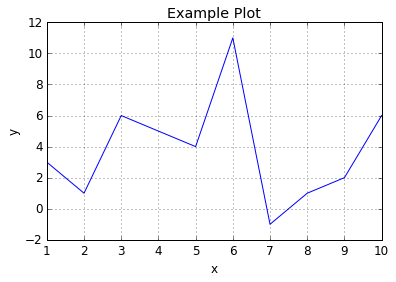

In [12]:
# Example data to make a plot
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]);  # Independent variable in the plot
y = np.array([3, 1, 6, 5, 4, 11, -1, 1, 2, 6]); # The dependent variable in the plot

# The commands for plotting y vs. x and formatting axes, etc.
fig = plt.figure()
plt.style.use('classic')
plt.plot(x, y)
plt.title("Example Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

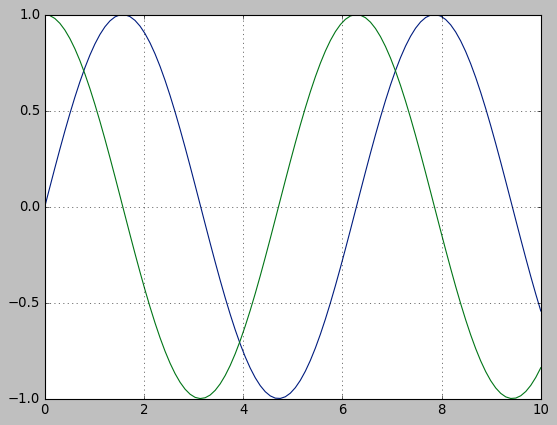

In [13]:
# Just another example plot
x = np.linspace(0, 10, 100)
fig2 = plt.figure()
plt.style.use('seaborn-dark-palette')
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.grid()

## United states wheat yield trends as a plotting example ...

Data was obtained from the United States Department of Agriculture: <a href="https://quickstats.nass.usda.gov/" target="_blank">Quick Stats</a> (The USDA's National Ag Statistics Service -- we might make more use of this data source later)

In [14]:
# The years for which we have average wheat yield data.
wdates = np.array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 
                   2005, 2004, 2003, 2002, 2001, 2000,1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 
                   1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 
                   1973, 1972, 1971, 1970, 1969, 1968, 1967,1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 
                   1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945,1944, 1943, 1942, 
                   1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 
                   1925, 1924, 1923,1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912,1911, 1910, 
                   1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901,1900, 1899, 1898, 1897, 1896, 1895, 1894, 
                   1893, 1892, 1891, 1890,1889, 1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879,1878, 
                   1877, 1876, 1875, 1874, 1873, 1872, 1871, 1870, 1869, 1868, 1867, 1866])

In [15]:
# The average wheat yield data in the order to line up with the corresponding years.
wyields = np.array([44.5, 49.7, 51.7, 47.6, 46.4, 52.7, 43.6, 43.7, 47.1, 46.2, 43.6, 46.1, 44.3, 44.8, 40.2, 
                    38.6, 42. , 43.2, 44.2, 35. , 40.2, 42. , 42.7, 43.2, 39.5, 36.3, 35.8, 37.6, 38.2, 39.3, 
                    34.3, 39.5, 32.7, 34.1, 37.7, 34.4, 37.5, 38.8, 39.4, 35.5, 34.5, 33.5, 34.2, 31.4, 30.7, 
                    30.3, 30.6, 27.3, 31.6, 32.7, 33.9, 31. , 30.6, 28.4, 25.8, 26.3, 26.5, 25.8, 25.2, 25. , 
                    23.9, 26.1, 21.6, 27.5, 21.8, 20.2, 19.8, 18.1, 17.3, 18.4, 16. , 16.5, 14.5, 17.9, 18.2, 
                    17.2, 17. , 17.7, 16.4, 19.5, 16.8, 15.3, 14.1, 13.3, 13.6, 12.8, 12.2, 12.1, 11.2, 13.1, 
                    16.3, 14.2, 13. , 15.4, 14.7, 14.7, 12.8, 16. , 13.3, 13.8, 12.7, 13.5, 12.9, 14.8, 13.2, 
                    11.9, 16.7, 16.1, 14.4, 15.1, 12.4, 13.7, 15.5, 14.3, 14.2, 16. , 15.2, 12.9, 13.7, 14.9, 
                    15. , 12.2, 12.5, 15.2, 14. , 12.8, 13.9, 13.5, 12.4, 14.2, 16.5, 12.2, 14. , 12.1, 13.3, 
                    14.1, 11.4, 14.8, 12.3, 15.1, 11. , 13.2, 13. , 13.5, 14.1, 10.9, 11.1, 13. , 12.9, 11.8, 
                    12.2, 12.1, 13.7, 12.9, 12.6, 11. ])

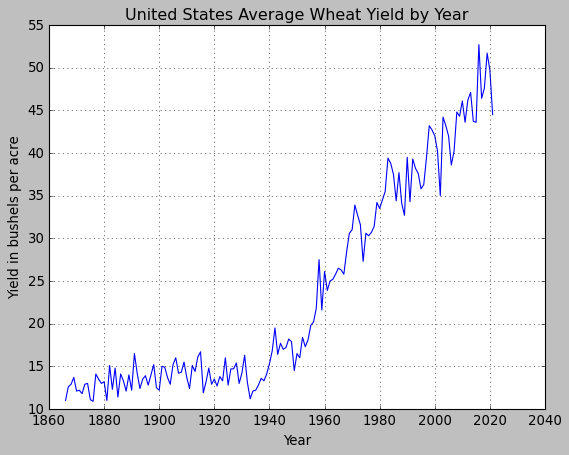

In [16]:
# Plotting the wheat yield trend
fig3 = plt.figure()
plt.style.use('classic')
plt.plot(wdates, wyields)
plt.title("United States Average Wheat Yield by Year")
plt.xlabel("Year")
plt.ylabel("Yield in bushels per acre")
plt.grid()

## HW problem. 

### Use the corn yield data given below to plot the corn and wheat yield trends on the same axes.

Read the tutorial material on plotting in the Date Mine `Examples Book` ...

<a href="https://the-examples-book.com/programming-languages/python/matplotlib" target="_blank">Matplotlib.</a>

Also check out ...
<a href="https://matplotlib.org/stable/tutorials/index.html" target="_blank">Matplotlib.org</a>

### Experiment with the line colors, labels, legends, etc.

### Estimate from the plot the trend in wheat and corn yield improvement over time. When did the trend start? Google around to find out about this yield improvement.

In [17]:
cdates = np.array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 
                   2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 
                   1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 
                   1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 
                   1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 
                   1941, 1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 
                   1925, 1924, 1923, 1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1912, 1911, 1910, 
                   1909, 1908, 1907, 1906, 1905, 1904, 1903, 1902, 1901, 1900, 1899, 1898, 1897, 1896, 1895, 1894, 
                   1893, 1892, 1891, 1890, 1889, 1888, 1887, 1886, 1885, 1884, 1883, 1882, 1881, 1880, 1879, 1878, 
                   1877, 1876, 1875, 1874, 1873, 1872, 1871, 1870, 1869, 1868, 1867, 1866])

cyields = np.array([176.3, 172, 167.5, 176.4, 176.6, 174.6, 168.4, 171, 158.1, 123.1, 146.8, 152.6, 164.4, 
                    153.3, 150.7, 149.1, 147.9, 160.3, 142.2, 129.3, 138.2, 136.9, 133.8, 134.4, 126.7, 
                    127.1, 113.5, 138.6, 100.7, 131.5, 108.6, 118.5, 116.3, 84.6, 119.8, 119.4, 118, 106.7, 
                    81.1, 113.2, 108.9, 91, 109.5, 101, 90.8, 88, 86.4, 71.9, 91.3, 97, 88.1, 72.4, 85.9, 79.5, 80.1,
                    73.1, 74.1, 62.9, 67.9, 64.7, 62.4, 54.7, 53.1, 52.8, 48.3, 47.4, 42, 39.4, 40.7, 41.8, 36.9, 
                    38.2, 38.2, 43, 28.6, 37.2, 33.1, 33, 32.6, 35.4, 31.2, 28.9, 29.9, 27.8, 28.9, 18.6, 24.2, 
                    18.7, 22.8, 26.5, 24.5, 20.5, 25.7, 26.3, 26.4, 25.7, 27.4, 22.1, 27.8, 26.3, 27.8, 29.9, 26.8, 
                    23.9, 26.2, 24.1, 28.1, 25.8, 22.7, 29.1, 24.4, 27.9, 26.1, 26.9, 27.2, 31.7, 30.9, 28.2, 26.9, 
                    28.5, 18.2, 28.1, 28, 26.8, 25.4, 30, 28, 20.2, 23.8, 24.7, 29.6, 22.1, 29.5, 29.1, 21.9, 24.1, 
                    28.6, 28.3, 24.2, 26.5, 19.8, 27.3, 28.2, 26.2, 25.8, 26.7, 27.7, 22.2, 22.9, 29.4, 27.2, 29.3, 
                    21.8, 26.2, 24.7, 24.3])

## Solution .... (Put it here)

### Here is an interesting article ...

<a href="https://www.agry.purdue.edu/ext/corn/news/timeless/yieldtrends.html#:~:text=Rapid%20adoption%20of%20double%2Dcross,grain%20yield%20improvement%20had%20occurred." target="_blank">Corny News Network.</a>



## C integers vs. Python integers

A C integer is essentially a label for a position in memory whose bytes encode an 
integer value.

A Python integer is a label for a position in memory containing a C structure that 
contains the Python object information including the bytes that encode the integer 
value.

In [18]:
# L is an integer. Let's see how many bytes it requires (a byte is 8 bits)
# sys.getsizeof() returns the number of bytes needed to encode 
# the object

import sys

L = 1
print(L)
print(type(L))


print(f'The number of bytes needed to store this variable is {sys.getsizeof(L)}')

1
<class 'int'>
The number of bytes needed to store this variable is 28


**For information** about the `sys` package see: <a href="https://docs.python.org/3/library/sys.html" target="_blank">System-specific parameters and functions</a>.

The size of a python integer is **not** strongly related to the size of the integer. This is an indication of the overhead associated with the representation. For example ...

In [19]:
print('Decimal Integer Hex Integer #Bytes Needed to Store')
print('_______________ ___________ ______________________')

for k in range(0,40):
    L = 2**k
    print(f'{L:12d}    {hex(L):12s}       {sys.getsizeof(L)}')

Decimal Integer Hex Integer #Bytes Needed to Store
_______________ ___________ ______________________
           1    0x1                28
           2    0x2                28
           4    0x4                28
           8    0x8                28
          16    0x10               28
          32    0x20               28
          64    0x40               28
         128    0x80               28
         256    0x100              28
         512    0x200              28
        1024    0x400              28
        2048    0x800              28
        4096    0x1000             28
        8192    0x2000             28
       16384    0x4000             28
       32768    0x8000             28
       65536    0x10000            28
      131072    0x20000            28
      262144    0x40000            28
      524288    0x80000            28
     1048576    0x100000           28
     2097152    0x200000           28
     4194304    0x400000           28
     8388608    0x800000

## How about string variables?

In [20]:
L = "1"
print(L)
print(type(L))
print(f'The number of bytes needed to store this variable is {sys.getsizeof(L)}')

1
<class 'str'>
The number of bytes needed to store this variable is 50


In [21]:
print('String         #Bytes Needed to Store')
print('______________ ______________________')

L = "1"
for k in range(0,20):
    print(f'{L:20s}      {sys.getsizeof(L)}')
    L = L + '1'


String         #Bytes Needed to Store
______________ ______________________
1                         50
11                        51
111                       52
1111                      53
11111                     54
111111                    55
1111111                   56
11111111                  57
111111111                 58
1111111111                59
11111111111               60
111111111111              61
1111111111111             62
11111111111111            63
111111111111111           64
1111111111111111          65
11111111111111111         66
111111111111111111        67
1111111111111111111       68
11111111111111111111      69


## Now for Lists, Arrays, Numpy Arrays ...

In [22]:
L1 = list(range(20))
print(L1)
print(type(L1))
print(type(L1[0]))
print(sys.getsizeof(L1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
<class 'list'>
<class 'int'>
216


In [23]:
L2 = [str(c) for c in L1]
print(L2)
print(type(L2))
print(type(L2[0]))
print(sys.getsizeof(L2))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
<class 'list'>
<class 'str'>
256


In [24]:
# Comparing Python list and Python array

import array
L = list(range(100))
A = array.array('i',L)

print(A)
print(type(A))
print(type(A[0]))
print(sys.getsizeof(A))

print("\n")

print(L)
print(type(L))
print(type(L[0]))
print(sys.getsizeof(L))

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
<class 'array.array'>
<class 'int'>
464


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
<class 'list'>
<class 'int'>
856


The python array is **more efficient for storage** than is the python list because overhead can be reduced given all the elements in the array are of the same type.

### Numpy array vs. array wrt storage ...

In [25]:
# The Python array object offers (more) efficient storage of array-based data than does 
# the list object. Numpy arrays also add efficient computations on that data.

ND = np.array(L) # np.array is used to create an ndarray from a Python list
print(ND)
print(type(ND))
print(sys.getsizeof(ND))
print("itemsize:", ND.itemsize, "bytes")
print("nbytes:", ND.nbytes, "bytes")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
<class 'numpy.ndarray'>
904
itemsize: 8 bytes
nbytes: 800 bytes


**Note** the numpy array at 896 bytes comes in between the list at 1008 bytes and the array at 464 bytes. Numpy gets its advantage from computation.

## Computation Comparisons ...

Make some arrays of reasonable length and then square the elements in each using `for` loops and comparing to numpy's built in `ufuncs`.

In [26]:
# Make a plain python array and then square the elements using a for loop ...
A = array.array('i', range(1000))

%timeit A2 = [A[k]**2 for k in range(1000)]

A2 = [A[k]**2 for k in range(1000)]

print(A2)

252 µs ± 4.01 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801, 10000, 10201, 10404, 10609, 10816, 11025, 11236, 11449, 11664, 11881, 12100, 12321, 12544, 12769, 12996, 13225, 13456, 13689, 13924, 14161, 14400, 14641, 14884, 15129, 15376, 15625, 15876, 16129, 16384, 16641, 16900, 17161, 17424, 17689, 17956, 18225, 18496, 18769, 19044, 19321, 19600, 19881, 20164, 20449, 20736, 21025, 21316, 21609, 21904, 22201, 22500, 22801, 23104, 23

In [27]:
# Make a numpy python array and then square the elements using a for loop ...
ND = np.array(range(1000))

%timeit ND2_v1 = [ND[k]**2 for k in range(1000)]

ND2_v1 = [ND[k]**2 for k in range(1000)]

print(ND2_v1)

198 µs ± 4.68 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801, 10000, 10201, 10404, 10609, 10816, 11025, 11236, 11449, 11664, 11881, 12100, 12321, 12544, 12769, 12996, 13225, 13456, 13689, 13924, 14161, 14400, 14641, 14884, 15129, 15376, 15625, 15876, 16129, 16384, 16641, 16900, 17161, 17424, 17689, 17956, 18225, 18496, 18769, 19044, 19321, 19600, 19881, 20164, 20449, 20736, 21025, 21316, 21609, 21904, 22201, 22500, 22801, 23104, 23

In [28]:
%timeit ND_v2 = np.multiply(ND,ND)

ND_v2 = np.multiply(ND,ND)

print(ND_v2)

631 ns ± 6.65 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
[     0      1      4      9     16     25     36     49     64     81
    100    121    144    169    196    225    256    289    324    361
    400    441    484    529    576    625    676    729    784    841
    900    961   1024   1089   1156   1225   1296   1369   1444   1521
   1600   1681   1764   1849   1936   2025   2116   2209   2304   2401
   2500   2601   2704   2809   2916   3025   3136   3249   3364   3481
   3600   3721   3844   3969   4096   4225   4356   4489   4624   4761
   4900   5041   5184   5329   5476   5625   5776   5929   6084   6241
   6400   6561   6724   6889   7056   7225   7396   7569   7744   7921
   8100   8281   8464   8649   8836   9025   9216   9409   9604   9801
  10000  10201  10404  10609  10816  11025  11236  11449  11664  11881
  12100  12321  12544  12769  12996  13225  13456  13689  13924  14161
  14400  14641  14884  15129  15376  15625  15876  16129  16384  16641
  

### The squaring of the numpy array elements using the `ufunc` method is about 350 times faster than a `for` loop!

There is also a shorthand for numpy ufunc. For example:

`np.multiply(ND,ND) = ND**2 = ND*ND`



## Arrays and indexing
We are going to need to use some of python's array indexing and slicing capabilities below. Therefore, we introduce them here.

In [29]:
# Make an example one-dimensional array and fill it with random 
# integers. As used below the integers are between 0 and 9. The
# array size is 20. The first entry in the array is x[0] and the last
# is x[19]

x1 = np.random.randint(10, size=20)
print(x1)
print(x1[0])
print(x1[5])

[6 9 3 5 9 8 4 7 3 6 2 1 0 8 1 8 6 8 0 1]
6
8


In [30]:
# The "shape" method shows that x1 is a one-dimensional array of
# length 20
print(x1.shape)
print(len(x1))

(20,)
20


## Array slicing
This capability allows a simple way to access subarrays contained inside of an array. The notation uses the `:` operator. To access a slice of a **one-dimensional** array:

- x1[start:stop:step]

where

- start is the beginning index (default if unspecified: start = 0)
- stop is the ending index plus 1 (default if unspecified: stop = len(x1))
- step is the spacing (default if unspecified: step = 1)

In [31]:
x1

array([6, 9, 3, 5, 9, 8, 4, 7, 3, 6, 2, 1, 0, 8, 1, 8, 6, 8, 0, 1])

In [32]:
x1[1:11]

array([9, 3, 5, 9, 8, 4, 7, 3, 6, 2])

In [33]:
# Every other entry starting from second entry and ending by the
# 11th
x1[1:11:2]

array([9, 5, 8, 7, 6])

In [34]:
# Ditto but every third
x1[1:11:3]

array([9, 9, 7, 2])

In [35]:
# Starting from first entry
x1[:11]

array([6, 9, 3, 5, 9, 8, 4, 7, 3, 6, 2])

In [36]:
# Another way to get the entire array. Useful with multidimensional
# arrays
x1[:]

array([6, 9, 3, 5, 9, 8, 4, 7, 3, 6, 2, 1, 0, 8, 1, 8, 6, 8, 0, 1])

In [37]:
# Every other entry starting from first (i.e., even indices)
x1[::2]

array([6, 3, 9, 4, 3, 2, 0, 1, 6, 0])

In [38]:
# Every other entry starting from second (i.e., odd indices)
x1[1::2]

array([9, 5, 8, 7, 6, 1, 8, 8, 8, 1])

## Two-dimensional arrays

In [39]:
# Now generalize to matrix (a.k.a., a two-dimensional array).
x2 = np.random.randint(10, size=(10,10))
print(x2)

[[6 8 8 9 2 9 4 4 4 7]
 [4 4 5 6 7 8 4 9 1 8]
 [7 3 3 2 5 2 6 9 5 6]
 [9 1 7 2 3 1 7 7 1 5]
 [5 6 2 7 2 5 1 1 9 6]
 [7 7 1 4 9 0 7 3 0 6]
 [1 4 2 6 5 7 2 9 4 4]
 [7 6 4 5 4 0 2 7 1 8]
 [7 5 7 0 3 0 6 5 9 3]
 [1 4 6 9 8 7 9 2 6 5]]


In [40]:
# How to address an individual entry in x2 ...
x2[2,4]

5

In [41]:
# How to address the individual rows of x2 ...
x2[2,:]

array([7, 3, 3, 2, 5, 2, 6, 9, 5, 6])

In [42]:
# How to address the individual columns of x2
x2[:,1]

array([8, 4, 3, 1, 6, 7, 4, 6, 5, 4])

### Notice how numpy treats the row and column arrays as 1D arrays. In otherwords, it does not keep track of the distinction between a row and a column of a matrix ...

In [43]:
# How to extract a sub-array
x2[1:3,2:4]

array([[5, 6],
       [3, 2]])

In [44]:
# Just to see the original
x2

array([[6, 8, 8, 9, 2, 9, 4, 4, 4, 7],
       [4, 4, 5, 6, 7, 8, 4, 9, 1, 8],
       [7, 3, 3, 2, 5, 2, 6, 9, 5, 6],
       [9, 1, 7, 2, 3, 1, 7, 7, 1, 5],
       [5, 6, 2, 7, 2, 5, 1, 1, 9, 6],
       [7, 7, 1, 4, 9, 0, 7, 3, 0, 6],
       [1, 4, 2, 6, 5, 7, 2, 9, 4, 4],
       [7, 6, 4, 5, 4, 0, 2, 7, 1, 8],
       [7, 5, 7, 0, 3, 0, 6, 5, 9, 3],
       [1, 4, 6, 9, 8, 7, 9, 2, 6, 5]])

In [45]:
# Subarray with every other row and column (even) 
x2[::2,::2]

array([[6, 8, 2, 4, 4],
       [7, 3, 5, 6, 5],
       [5, 2, 2, 1, 9],
       [1, 2, 5, 2, 4],
       [7, 7, 3, 6, 9]])

In [46]:
# Subarray with every other row and column (odd)
x2[1::2,1::2]

array([[4, 6, 8, 9, 8],
       [1, 2, 1, 7, 5],
       [7, 4, 0, 3, 6],
       [6, 5, 0, 7, 8],
       [4, 9, 7, 2, 5]])

### Even and Odd Subarrays ...
Each time we only get a fourth of the elements in the original. How would you index to get the rest of them?

<img align="left" src='Figs/SubarrayFig.png' width="700"/>

## Numerical Linear Algebra

Python is often used for operations associated with systems of linear equations. `Numpy` is a package that is useful for representing the arrays that hold: 1) the coefficient matrix defining the equations, 2) the column vector defining the unknown variables, and 3) the column vector holding the right-hand side of the matrix equation.

There is also a package called `SciPy` which is useful for solving the equations.

### Stop here to cipher on the white board ...

In [47]:
import numpy as np
import scipy.linalg as la

### 1D and 2D Arrays

In [48]:
a = np.array([1, 3, -2, 1])
print(a)
print(f'The number of dimensions is: {a.ndim}')
print(f'The shape of the array is: {a.shape}')
print(f'The size of the array is: {a.size}')

[ 1  3 -2  1]
The number of dimensions is: 1
The shape of the array is: (4,)
The size of the array is: 4


In [49]:
M = np.array([[1, 2], [3, 7], [-1, 5]])
print(M)
print(f'The number of dimensions is: {M.ndim}')
print(f'The shape of the array is: {M.shape}')
print(f'The size of the array is: {M.size}')

[[ 1  2]
 [ 3  7]
 [-1  5]]
The number of dimensions is: 2
The shape of the array is: (3, 2)
The size of the array is: 6


In [50]:
# Selecting rows and/or columns from a 2D array produces 1D arrays
col = M[:,1]
print(col)
print(f'The number of dimensions is: {col.ndim}')
print(f'The shape of the column is: {col.shape}')
print(f'The size of the column is: {col.size}')
print()
row = M[1,:]
print(row)
print(f'The number of dimensions is: {row.ndim}')
print(f'The shape of the row is: {row.shape}')
print(f'The size of the row is: {row.size}')

[2 7 5]
The number of dimensions is: 1
The shape of the column is: (3,)
The size of the column is: 3

[3 7]
The number of dimensions is: 1
The shape of the row is: (2,)
The size of the row is: 2


### In both cases we ended up with a 1D array when sampling the 2D array. If we really want the column vector to be a 2D array, then this can be accomplished using the `reshape` method ...

In [51]:
newcol = col.reshape(3,1)
print(newcol)
print(f'The number of dimensions is: {newcol.ndim}')
print(f'The shape of the column is: {newcol.shape}')
print(f'The size of the column is: {newcol.size}')

[[2]
 [7]
 [5]]
The number of dimensions is: 2
The shape of the column is: (3, 1)
The size of the column is: 3


## Matrix Operations and Functions

The matrix operations `+`, `-`, `/`, `*`, and `**` are performed elementwise on numpy arrays.

In [52]:
print(M)

[[ 1  2]
 [ 3  7]
 [-1  5]]


In [53]:
print(M + M)

[[ 2  4]
 [ 6 14]
 [-2 10]]


In [54]:
print(M * M)

[[ 1  4]
 [ 9 49]
 [ 1 25]]


### Standard matrix multiplication is performed with the `@` operator. The matrix dimensions must work out in order for this to be well-defined ...

In [55]:
A = np.array([[1,3], [2,4]])
print(A)

[[1 3]
 [2 4]]


In [56]:
print(A @ A)

[[ 7 15]
 [10 22]]


In [57]:
x = np.array([[2], [5]])
print(x)

[[2]
 [5]]


In [58]:
print(A @ x)

[[17]
 [24]]


### Experiment with additional matrix operators, etc:

* How to make an identity matrix with `np.eye`
* Numpy has a matrix power function `np.linalg.matrix_power`
* There is a matrix transpose operator ...
* There is a matrix inverse function `scipy.linalg.inv`
* There is a trace function `numpy.trace`
* The determinant can be computed using `scipy.linalg.det`

In many cases we will want to use a shorthand in order to not have to type the long names of these functions ...



In [59]:
np.linalg.matrix_power(A, 2)

array([[ 7, 15],
       [10, 22]])

In [60]:
from numpy.linalg import matrix_power as mpow
mpow(A, 2)

array([[ 7, 15],
       [10, 22]])

In [61]:
print(A.T)

[[1 2]
 [3 4]]


In [62]:
print(la.inv(A))

[[-2.   1.5]
 [ 1.  -0.5]]


## Solving a systems of linear equations ...

`scipy.linalg.solve`

In [63]:
# Work on the problem we wrote on the board before

A = np.array([[2, -1], [1, 1]])
b = np.array([[-3], [4]])
print(A)
print(b)

[[ 2 -1]
 [ 1  1]]
[[-3]
 [ 4]]


In [64]:
x = la.solve(A,b)
print(x)

[[0.33333333]
 [3.66666667]]


## HW Problem: Use least-squares to fit best lines to the wheat and corn yield trend data from before ...

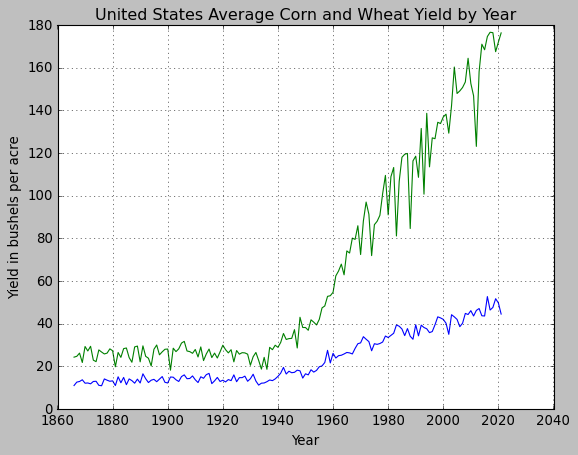

In [65]:
# Plotting the wheat yield trend
fig3 = plt.figure()
plt.style.use('classic')
plt.plot(wdates, wyields)
plt.plot(cdates, cyields)
plt.title("United States Average Corn and Wheat Yield by Year")
plt.xlabel("Year")
plt.ylabel("Yield in bushels per acre")
plt.grid()

### Stop here to cipher on the board ...